# SELECT statement

**View all rows in a table**
* `TABLE teachers;`
* `SELECT * FROM teachers;`

**Querying a Subset of Columns**:
* `SELECT last_name, first_name, salary FROM teachers;`

# Sorting Data with ORDER BY

```
SELECT first_name, last_name, salary
FROM teachers
ORDER BY salary DESC;
```

* By default, `ORDER BY` sorts values in ascending order.
* Sort in descending order by adding the `DESC` keyword.
* The optional `ASC` keyword specifies sorting in ascending order.

**The `ORDER BY` clause also accepts numbers instead of column names, with the number identifying the sort column according to its position in the `SELECT` clause.**

```
SELECT first_name, last_name, salary
FROM teachers
ORDER BY 3 DESC;
```

**Sorting multiple columns with `ORDER BY`**

```
SELECT last_name, school, hire_date
FROM teachers
ORDER BY school ASC, hire_date DESC;
```

* In this case, we’re retrieving the last names of teachers, their school, and the date they were hired.
* By sorting the `school` column in ascending order and `hire_date` in descending order, we create a listing of teachers grouped by school with the most recently hired teachers listed first.
* This shows us who the newest teachers are at each school.

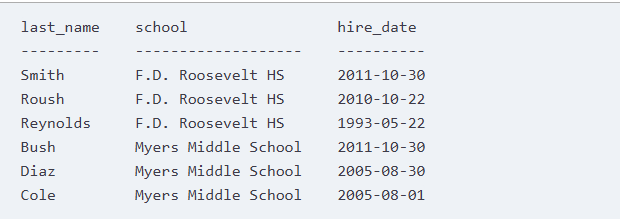

You can use `ORDER BY` on more than two columns, but you’ll soon reach a point of diminishing returns where the effect will be hardly noticeable. Imagine if you added columns about teachers’ highest college degree attained, the grade level taught, and birthdate to the `ORDER BY` clause. It would be difficult to understand the various sort directions in the output all at once, much less communicate that to others. Digesting data happens most easily when the result focuses on answering a specific question; therefore, a better strategy is to limit the number of columns in your query to only the most important and then run several queries to answer each question you have.

# Using DISTINCT to Find Unique Values

**Querying distinct values in the `school` column**

To understand the range of values in a column, we can use the `DISTINCT` keyword as part of a query that eliminates duplicates and shows only unique values. Use `DISTINCT` immediately after `SELECT`.

```
SELECT DISTINCT school
FROM teachers
ORDER BY school;
```

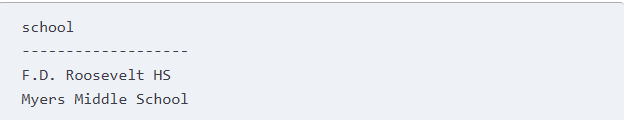

**Querying distinct pairs of values in the `school` and `salary` columns**

* The `DISTINCT` keyword also works on more than one column at a time. 
* If we add a column, the query returns each unique pair of values.

```
SELECT DISTINCT school, salary
FROM teachers
ORDER BY school, salary;
```

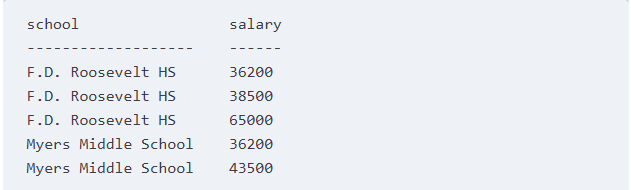

# Filtering Rows with `WHERE`

```
SELECT last_name, school, hire_date
FROM teachers
WHERE school = 'Myers Middle School';
```

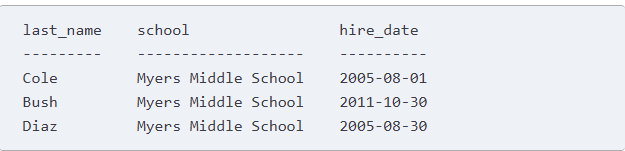


#  Comparison and Matching Operators in PostgreSQL

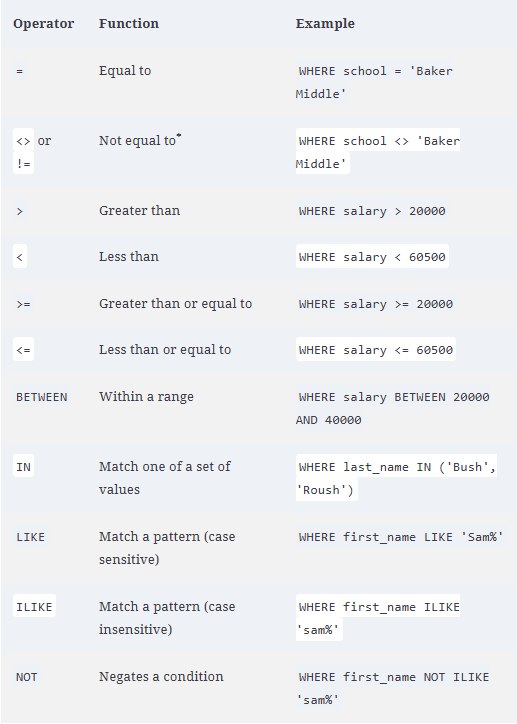

**First, we use the equal operator to find teachers whose first name is Janet:**
```
SELECT first_name, last_name, school
FROM teachers
WHERE first_name = 'Janet';
```

**Next, we list all school names in the table but exclude `F.D. Roosevelt HS` using the not-equal operator:**
```
SELECT school
FROM teachers
WHERE school <> 'F.D. Roosevelt HS';
```

**Here we use the less-than operator to list teachers hired before `January 1, 2000` (using the date format `YYYY-MM-DD`):**
```
SELECT first_name, last_name, hire_date
FROM teachers
WHERE hire_date < '2000-01-01';
```

**Then we find teachers who earn `$43,500` or more using the `>=` operator:**
```
SELECT first_name, last_name, salary
FROM teachers
WHERE salary >= 43500;
```

**The next query uses the `BETWEEN` operator to find teachers who earn from `$40,000` to `$65,000`.**
```
SELECT first_name, last_name, school, salary
FROM teachers
WHERE salary BETWEEN 40000 AND 65000;
```
> Note that `BETWEEN` is inclusive, meaning the result will include values matching the start and end ranges specified.

Use caution with `BETWEEN`, because its inclusive nature can lead to inadvertent double-counting of values. For example, if you filter for values with `BETWEEN 10 AND 20` and run a second query using `BETWEEN 20 AND 30`, a row with the value of `20` will appear in both query results. You can avoid this by using the more explicit greater-than and less-than operators to define ranges. For example, this query returns the same result as the previous one but more obviously specifies the range:

```
SELECT first_name, last_name, school, salary
FROM teachers
WHERE salary >= 40000 AND salary <= 65000;
```

# Using LIKE and ILIKE with WHERE

To use `LIKE` and `ILIKE`, you specify a pattern to match using one or both of these symbols:
* **`Percent sign (%)`** A wildcard matching one or more characters
* **`Underscore (_)`** A wildcard matching just one character

For example, if you’re trying to find the word baker, the following `LIKE` patterns will match it:
```
LIKE 'b%'
LIKE '%ak%'
LIKE '_aker'
LIKE 'ba_er'
```

> NOTE:
> * The `LIKE` operator, which is part of the ANSI SQL standard, is case sensitive.
> * The `ILIKE` operator, which is a PostgreSQL-only implementation, is case insensitive.

**Filtering with `LIKE` and `ILIKE`**

```
SELECT first_name
FROM teachers
WHERE first_name LIKE 'sam%';

SELECT first_name
FROM teachers
WHERE first_name ILIKE 'sam%';
```

Because `LIKE` and `ILIKE` search for patterns, performance on large databases can be slow. We can improve performance using indexes.

# Combining Operators with AND and OR

```
SELECT *
FROM teachers
WHERE school = 'Myers Middle School'
      AND salary < 40000;

SELECT *
FROM teachers
WHERE last_name = 'Cole'
      OR last_name = 'Bush';

SELECT *
FROM teachers
WHERE school = 'F.D. Roosevelt HS'
      AND (salary < 38000 OR salary > 40000);
```